Machine Learning Task 2
Heart Disease Prediction using Logistic Regression

Heart disease is one of the leading causes of mortality worldwide, and early detection and risk prediction can be crucial in improving patient outcomes. We will use logistic regression to predict the risk of heart disease in patients. We will use the Framingham Heart Study dataset, which contains valuable information on cardiovascular risk factors.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values
# imputer = SimpleImputer(strategy='mean')
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode the target variable
label_encoder = LabelEncoder()
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])

# Split data into features and target
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [ ]:
# Instantiate the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict on test data
y_pred = log_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8519
Precision: 0.7857
Recall: 0.9167
F1 Score: 0.8462
Confusion Matrix:
[[24  6]
 [ 2 22]]


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

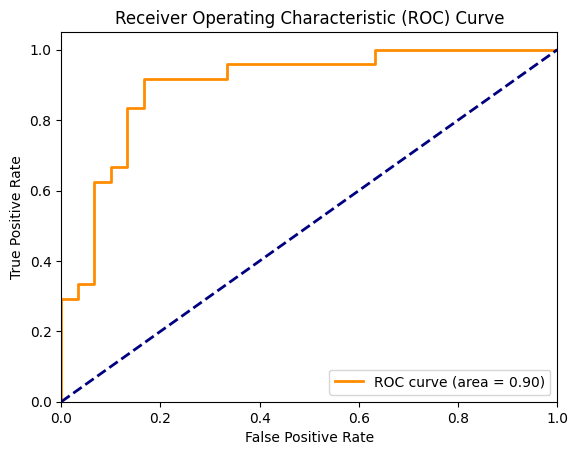

Cross-Validation Accuracy Scores: [0.7962963  0.83333333 0.87037037 0.83333333 0.88888889]
Mean Cross-Validation Accuracy: 0.8444
Standard Deviation of Cross-Validation Accuracy: 0.0323


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Plot ROC curve and calculate AUC
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Cross-Validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')


In [ ]:
# Get the feature names
feature_names = X.columns

# Get the coefficients
coefficients = log_reg.coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False).drop(columns=['AbsCoefficient'])

print(coef_df)


                    Feature  Coefficient
11  Number of vessels fluro     1.185815
1                       Sex     0.892978
2           Chest pain type     0.716174
12                 Thallium     0.584059
8           Exercise angina     0.481397
10              Slope of ST     0.413332
3                        BP     0.408911
7                    Max HR    -0.399307
5              FBS over 120    -0.348062
4               Cholesterol     0.341332
9             ST depression     0.240689
6               EKG results     0.073099
0                       Age     0.025203
